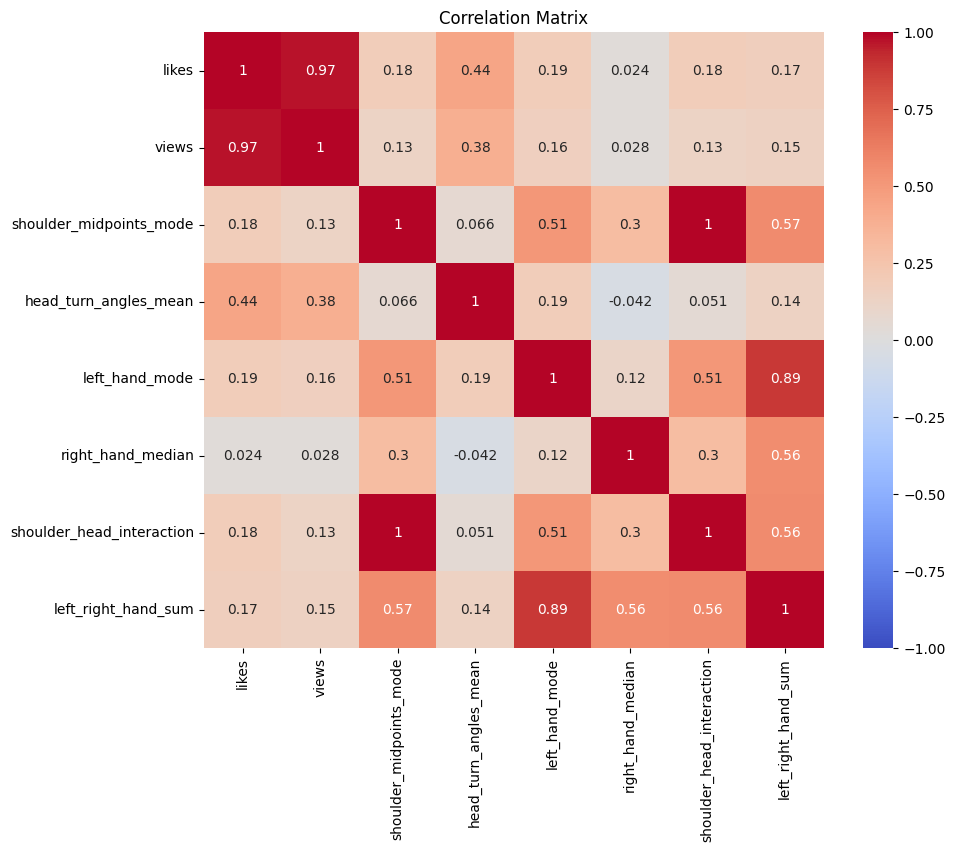

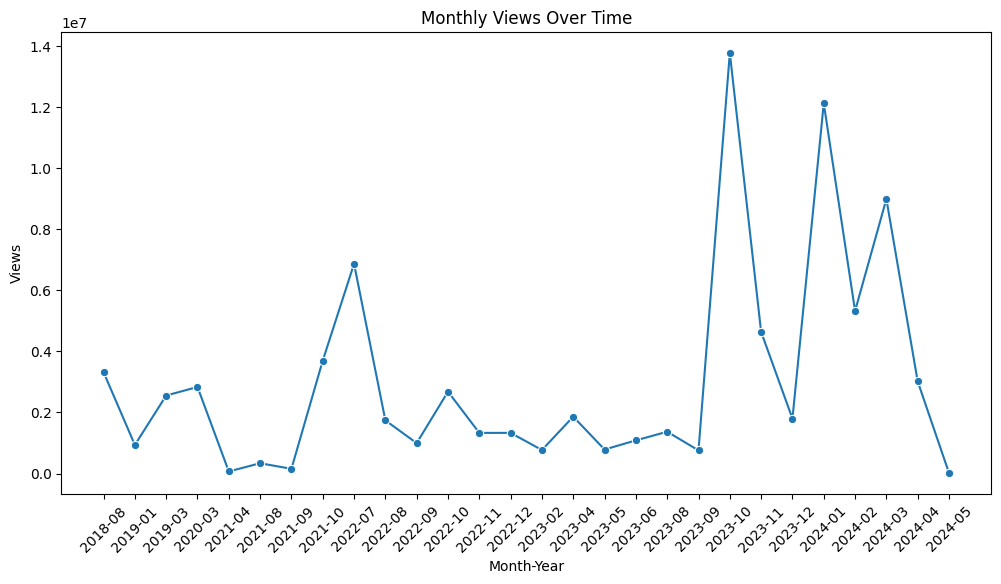

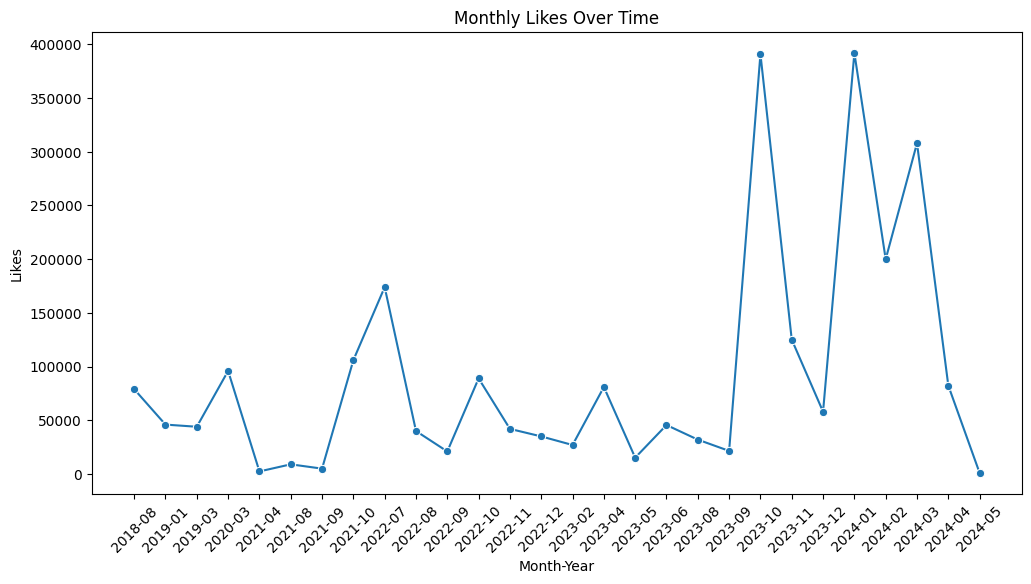

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy.stats import mode
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA

# Load the data
excel_file = 'btp_list.xlsx'
data = pd.read_excel(excel_file)

# Preprocess the data
# Convert published_date to datetime format
data['published_date'] = pd.to_datetime(data['published_date'], format='%b %d, %Y')

# Aggregate emotions
emotion_counts = data['resulted_emotions'].str.get_dummies(sep=',').sum()

# Analyze shoulder_midpoints, head_turn_angles, left_hand, and right_hand
data['shoulder_midpoints_mode'] = data['shoulder_midpoints'].apply(lambda x: mode([float(i) for i in x.split(', ')])[0])
data['head_turn_angles_mean'] = data['head_turn_angles'].apply(lambda x: np.mean([float(i) for i in x.split(', ')]))
data['left_hand_mode'] = data['left_hand'].apply(lambda x: mode([float(i) for i in x.split(', ')])[0])
data['right_hand_median'] = data['right_hand'].apply(lambda x: np.median([float(i) for i in x.split(', ')]))

# Feature Engineering
# Interaction terms
data['shoulder_head_interaction'] = data['shoulder_midpoints_mode'] * data['head_turn_angles_mean']
data['left_right_hand_sum'] = data['left_hand_mode'] + data['right_hand_median']

# Transformations (e.g., log transformation to linearize relationships)
data['likes'] = data['likes']
data['views'] = data['views']

# Normalization
# features_to_normalize = ['shoulder_midpoints_mode', 'head_turn_angles_mean', 'left_hand_mode', 'right_hand_median', 'shoulder_head_interaction', 'left_right_hand_sum']
# scaler = StandardScaler()
# data[features_to_normalize] = scaler.fit_transform(data[features_to_normalize])

# # Dimensionality Reduction
# pca = PCA(n_components=2)
# pca_features = pca.fit_transform(data[features_to_normalize])
# data['pca1'] = pca_features[:, 0]
# data['pca2'] = pca_features[:, 1]

# Correlation analysis
corr_matrix = data[['likes', 'views','shoulder_midpoints_mode', 'head_turn_angles_mean', 'left_hand_mode', 'right_hand_median', 'shoulder_head_interaction', 'left_right_hand_sum']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

# Time series analysis
data['month_year'] = data['published_date'].dt.to_period('M').astype(str)
monthly_data = data.groupby('month_year').agg({'views': 'sum', 'likes': 'sum'}).reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='views', data=monthly_data, marker='o')
plt.title('Monthly Views Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Views')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(x='month_year', y='likes', data=monthly_data, marker='o')
plt.title('Monthly Likes Over Time')
plt.xlabel('Month-Year')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

# # Save processed data to a new CSV file
# data.to_csv('processed_youtube_video_data.csv', index=False)

# print("Data processing complete and saved to 'processed_youtube_video_data.csv'.")


In [19]:
data.head()

,youtube_video_code,speaker_name,category,likes,views,published_date,resulted_emotions,shoulder_midpoints,head_turn_angles,left_hand,right_hand,shoulder_midpoints_mode,head_turn_angles_mean,left_hand_mode,right_hand_median,shoulder_head_interaction,left_right_hand_sum,month_year
0,Seheo-meHEU,Created by Ella,Laptop,18000,58276,2024-02-26,"happy, happy, fear, angry, angry, angry, neutr...","0.48979201912879944, 0.4950191527605057, 0.436...","57.145146535993305, 79.46977806650706, 41.2601...","22.503470328985724, 22.517390974099836, 21.887...","20.05303404507399, 17.33351710539381, 20.04115...",-0.174744,65.717713,7.195433,17.988755,-11.483795,25.184188,2024-02
1,nzyaFRitfrQ,Created by Ella,Laptop,40000,1740468,2022-08-13,"neutral, happy, happy, happy, happy, happy, ha...","0.6764988899230957, 0.6415427923202515, 0.4953...","51.13045626917663, 7.804297708299411, 68.45479...","25.643041765579856, 25.636040609153344, 26.814...","16.79966929968486, 17.113133161778418, 18.3591...",-0.198249,70.339922,7.259663,19.838018,-13.944831,27.097681,2022-08
2,6M1GbIjrD9s,Created by Ella,Laptop,1900,55832,2023-09-08,"fear, fear, sad, neutral, happy, happy, happy,...","0.032963383942842484, 0.049329930916428566, 0....","85.57177719070094, 71.01503403659258, 101.5501...","23.111614383329652, 23.298376378609564, 25.122...","22.689000667527058, 23.32262588365227, 21.0960...",-0.474103,72.997308,10.162301,21.364377,-34.608235,31.526678,2023-09
3,IrgOlrVT-mo,Created by Ella,Laptop,5600,266329,2023-05-20,"happy, happy, happy, fear, happy, happy, happy...","0.5452885329723358, 0.5744092762470245, 0.2014...","35.713845796199514, 83.42655398000998, 71.2281...","20.874841646442984, 21.492560856244776, 24.248...","8.577952471019177, 18.475426545998456, 18.6792...",0.044933,71.310475,9.496177,19.024281,3.204220,28.520459,2023-05
4,e7a9a_X-ebw,Created by Ella,Laptop,9600,518905,2023-05-05,"happy, angry, angry, happy, happy, fear, neutr...","0.7308677434921265, 0.6463309526443481, 0.4993...","111.71656840734319, 25.622528727508872, 73.235...","22.000295296132165, 21.62805766455547, 22.0567...","21.99622523232537, 21.559523184739653, 19.2801...",-0.203990,74.796925,11.880863,19.731463,-15.257837,31.612326,2023-05


In [20]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
import joblib

# Split the dataset into features (X) and target variable (y)
X = data[['likes','shoulder_midpoints_mode', 'head_turn_angles_mean', 'left_hand_mode', 'right_hand_median', 'shoulder_head_interaction', 'left_right_hand_sum']]
y = data['views']

# Normalize the features
# scaler = MinMaxScaler()
# X_normalized = scaler.fit_transform(X)

# Split the normalized data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Replace missing values (NaN) with the mean of the column
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train_imputed, y_train)


# Save the trained model to a file
model_filename = 'linear_regression_model.pkl'
joblib.dump(model, model_filename)

print(f"Model saved as {model_filename}")

# Make predictions on the test set
y_pred = model.predict(X_test_imputed)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Model saved as linear_regression_model.pkl
Mean Squared Error: 88834471438.45876


In [21]:
from sklearn.metrics import r2_score

# Calculate R-squared
r_squared = r2_score(y_test, y_pred)
print("R-squared:", r_squared)


R-squared: 0.913039012264089


In [28]:
import cv2
import numpy as np
import pandas as pd
from yt_dlp import YoutubeDL
import mediapipe as mp
import joblib  # or use import pickle
from collections import Counter

# Load MediaPipe modules
mp_pose = mp.solutions.pose
mp_holistic = mp.solutions.holistic

# Function to calculate mode
def calculate_mode(lst):
    data = Counter(lst)
    return data.most_common(1)[0][0] if data else None

# Placeholder for 'likes' (you need to extract this from data or user input)
likes = 1000  # Replace with actual value

# Initialize lists to store extracted features
shoulder_midpoints = []
head_turn_angles_left = []
head_turn_angles_right = []
left_hand_distances = []
right_hand_distances = []

# Load the video
youtube_url = "https://youtu.be/Hu4Yvq-g7_Y?si=Ua2mQcxhu_aHzn4U"

# Download the video using yt-dlp
ydl_opts = {
    'format': 'best',
    'outtmpl': 'downloaded_video.%(ext)s',
}

with YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(youtube_url, download=True)
    video_file = ydl.prepare_filename(info_dict)
    likes = info_dict.get('like_count', 0)  # Extract likes from metadata

with YoutubeDL(ydl_opts) as ydl:
    info_dict = ydl.extract_info(youtube_url, download=True)
    video_file = ydl.prepare_filename(info_dict)

# Open the video using OpenCV
cap = cv2.VideoCapture(video_file)

# Initialize MediaPipe Holistics
holistic_model = mp_holistic.Holistic(
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5
)

# Process each frame
while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to RGB (MediaPipe requires RGB input)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process frame with Holistic model
    results = holistic_model.process(frame_rgb)

    # Extract shoulder midpoints
    left_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_SHOULDER] if results.pose_landmarks else None
    right_shoulder = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_SHOULDER] if results.pose_landmarks else None

    if left_shoulder and right_shoulder:
        shoulder_midpoint_x = (left_shoulder.x + right_shoulder.x) / 2
        shoulder_midpoints.append(shoulder_midpoint_x)
    
    # Extract head turn angles
    left_eye = results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_EYE_INNER] if results.pose_landmarks else None
    right_eye = results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_EYE_INNER] if results.pose_landmarks else None
    nose = results.pose_landmarks.landmark[mp_pose.PoseLandmark.NOSE] if results.pose_landmarks else None

    if left_eye and right_eye and nose:
        eye_line_vector = np.array([right_eye.x - left_eye.x, right_eye.y - left_eye.y])
        eye_left_nose_vector = np.array([nose.x - left_eye.x, nose.y - left_eye.y])
        eye_right_nose_vector = np.array([right_eye.x - nose.x, right_eye.y - nose.y])

        dot_product_left = np.dot(eye_line_vector, eye_left_nose_vector)
        eye_line_magnitude = np.linalg.norm(eye_line_vector)
        eye_left_nose_magnitude = np.linalg.norm(eye_left_nose_vector)

        dot_product_right = np.dot(eye_line_vector, eye_right_nose_vector)
        eye_right_nose_magnitude = np.linalg.norm(eye_right_nose_vector)

        cosine_angle_left = dot_product_left / (eye_line_magnitude * eye_left_nose_magnitude)
        cosine_angle_right = dot_product_right / (eye_line_magnitude * eye_right_nose_magnitude)

        head_turn_angle_left = np.arccos(cosine_angle_left) * (180 / np.pi)
        head_turn_angle_right = np.arccos(cosine_angle_right) * (180 / np.pi)

        head_turn_angles_left.append(head_turn_angle_left)
        head_turn_angles_right.append(head_turn_angle_right)
    
    # Extract hand landmarks and calculate distances
    if results.left_hand_landmarks:
        left_hand_landmarks = results.left_hand_landmarks.landmark
        left_hand_distances += [np.sqrt(lm.x ** 2 + lm.y ** 2 + lm.z ** 2) for lm in left_hand_landmarks]
    
    if results.right_hand_landmarks:
        right_hand_landmarks = results.right_hand_landmarks.landmark
        right_hand_distances += [np.sqrt(lm.x ** 2 + lm.y ** 2 + lm.z ** 2) for lm in right_hand_landmarks]

# Calculate required features
shoulder_midpoints_mode = calculate_mode([m for m in shoulder_midpoints if m is not None])
head_turn_angles_mean = np.mean([angle for angle in head_turn_angles_left + head_turn_angles_right if angle is not None])
left_hand_mode = calculate_mode(left_hand_distances)
right_hand_median = np.median(right_hand_distances)
shoulder_head_interaction = shoulder_midpoints_mode * head_turn_angles_mean

# Scale left hand mode and right hand median
left_hand_mode = left_hand_mode * 30
right_hand_median = right_hand_median * 30
left_right_hand_sum = left_hand_mode + right_hand_median

# Print extracted features (for verification)
print(f"Shoulder Midpoints Mode: {shoulder_midpoints_mode}")
print(f"Head Turn Angles Mean: {head_turn_angles_mean}")
print(f"Left Hand Mode: {left_hand_mode}")
print(f"Right Hand Median: {right_hand_median}")
print(f"Shoulder-Head Interaction: {shoulder_head_interaction}")
print(f"Left-Right Hand Sum: {left_right_hand_sum}")
print(f"Likes: {likes}")

# Construct DataFrame for prediction
data = {
    'likes': [likes],
    'shoulder_midpoints_mode': [shoulder_midpoints_mode],
    'head_turn_angles_mean': [head_turn_angles_mean],
    'left_hand_mode': [left_hand_mode],
    'right_hand_median': [right_hand_median],
    'shoulder_head_interaction': [shoulder_head_interaction],
    'left_right_hand_sum': [left_right_hand_sum]
}

df = pd.DataFrame(data)

# Load your pre-trained regression model using joblib
model_path = '/home/amit-saraswat/Documents/GitHub/Articulation-Meter/Project Files/linear_regression_model.pkl'  # Replace with actual path
model = joblib.load(model_path)  # Load your model

# Predict views using the model
predicted_views = model.predict(df)
predicted_views_scaled = predicted_views[0]
print(f"Predicted Views: {predicted_views_scaled}")

# Release video object
cap.release()


[youtube] Extracting URL: https://youtu.be/Hu4Yvq-g7_Y?si=Ua2mQcxhu_aHzn4U
[youtube] Hu4Yvq-g7_Y: Downloading webpage
[youtube] Hu4Yvq-g7_Y: Downloading ios player API JSON
[youtube] Hu4Yvq-g7_Y: Downloading m3u8 information
[info] Hu4Yvq-g7_Y: Downloading 1 format(s): 22
[download] downloaded_video.mp4 has already been downloaded
[download] 100% of   66.33MiB
[youtube] Extracting URL: https://youtu.be/Hu4Yvq-g7_Y?si=Ua2mQcxhu_aHzn4U
[youtube] Hu4Yvq-g7_Y: Downloading webpage
[youtube] Hu4Yvq-g7_Y: Downloading ios player API JSON
[youtube] Hu4Yvq-g7_Y: Downloading m3u8 information
[info] Hu4Yvq-g7_Y: Downloading 1 format(s): 22
[download] downloaded_video.mp4 has already been downloaded
[download] 100% of   66.33MiB


I0000 00:00:1718372345.928477    4061 gl_context_egl.cc:85] Successfully initialized EGL. Major : 1 Minor: 5
I0000 00:00:1718372345.930704   12217 gl_context.cc:357] GL version: 3.2 (OpenGL ES 3.2 Mesa 24.0.5-1ubuntu1), renderer: Mesa Intel(R) Xe Graphics (TGL GT2)
W0000 00:00:1718372346.011778   12214 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718372346.041711   12209 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718372346.042878   12207 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 00:00:1718372346.042962   12214 inference_feedback_manager.cc:114] Feedback manager requires a model with a single signature inference. Disabling support for feedback tensors.
W0000 

Shoulder Midpoints Mode: 0.637720137834549
Head Turn Angles Mean: 74.17244246308016
Left Hand Mode: 29.986394771182294
Right Hand Median: 26.279834467520963
Shoulder-Head Interaction: 47.30126023108063
Left-Right Hand Sum: 56.26622923870326
Likes: 427869
Predicted Views: 14295281.26151127


/home/amit-saraswat/my_env/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [57]:
# import cv2
# import numpy as np
# import pandas as pd
# from moviepy.editor import VideoFileClip
# from yt_dlp import YoutubeDL
# import mediapipe as mp
# import joblib  # or use import pickle
# from tensorflow.keras.models import load_model

# # Construct DataFrame for prediction
# data = {
#     'likes': [likes],
#     'shoulder_midpoints_mode': [shoulder_midpoints_mode],
#     'head_turn_angles_mean': [head_turn_angles_mean],
#     'left_hand_mode': [left_hand_mode],
#     'right_hand_median': [right_hand_median],
#     'shoulder_head_interaction': [shoulder_head_interaction],
#     'left_right_hand_sum': [left_right_hand_sum]
# }

# df = pd.DataFrame(data)

# # Load your pre-trained regression model using joblib
# model_path = '/home/amit-saraswat/Documents/GitHub/Articulation-Meter/Project Files/linear_regression_model.pkl'  # Replace with actual path
# model = joblib.load(model_path)  # Load your model

# # Predict views using the model
# predicted_views = model.predict(df)
# print(f"Predicted Views: {predicted_views}")

# # Release video object
# cap.release()

  warnings.warn(



Predicted Views: [2.64848978e+18]


In [58]:
# from sklearn.ensemble import RandomForestRegressor
# from sklearn.preprocessing import StandardScaler
# from sklearn.pipeline import Pipeline
# from sklearn.model_selection import GridSearchCV, cross_val_score
# from sklearn.metrics import mean_squared_error, r2_score
# import numpy as np

# pipeline = Pipeline([
#     ('scaler', StandardScaler()),
#     ('regressor', RandomForestRegressor(random_state=42))
# ])

# # Define hyperparameters grid for Random Forest Regressor
# param_grid = {
#     'regressor__n_estimators': [100, 200, 300],  # Number of trees in the forest
#     'regressor__max_depth': [None, 10, 20, 30],   # Maximum depth of the tree
#     'regressor__min_samples_split': [2, 5, 10],   # Minimum number of samples required to split an internal node
#     'regressor__min_samples_leaf': [1, 2, 4]      # Minimum number of samples required to be at a leaf node
# }

# # Perform Grid Search with cross-validation
# grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
# grid_search.fit(X_train, y_train)

# # Get the best model
# best_model = grid_search.best_estimator_

# # Evaluate the model using cross-validation
# cv_mse = cross_val_score(best_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
# cv_rmse = np.sqrt(-cv_mse.mean())
# print("Cross-Validation RMSE:", cv_rmse)

# # Make predictions on the test set
# y_pred = best_model.predict(X_test)

# # Evaluate the model on the test set
# mse = mean_squared_error(y_test, y_pred)
# r_squared = r2_score(y_test, y_pred)
# print("Mean Squared Error:", mse)
# print("R-squared:", r_squared)

# # Output the best hyperparameters
# print("Best hyperparameters:", grid_search.best_params_)
